In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pywaffle import Waffle
import seaborn as sns

df = pd.read_excel('xls/Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [99]:
df_waffle = df.copy()

df_waffle.drop(columns=['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],inplace=True)

df_waffle = df_waffle[df_waffle['OdName'].isin(['Denmark', 'Norway', 'Sweden'])]

df_waffle = df_waffle.melt(id_vars='OdName',var_name='Year')

df_waffle.rename(columns={'OdName':'Country'}, inplace=True)

df_waffle.head()


,Country,Year,value
0,Denmark,1980,272
1,Norway,1980,116
2,Sweden,1980,281
3,Denmark,1981,293
4,Norway,1981,77


In [100]:
df_waffle_group = df_waffle.groupby('Country')['value'].sum()

df_waffle_group

Country
Denmark    3901
Norway     2327
Sweden     5866
Name: value, dtype: int64

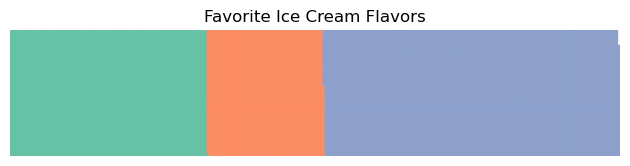

In [101]:
# Create a waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=50,
    values=df_waffle_group
)

# Add a title
plt.title('Favorite Ice Cream Flavors')

plt.tight_layout()
# Show the plot
plt.show()


### Word Clouds

In [102]:
df_words = df.copy()

df_words.drop(columns=['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],inplace=True)

df_words = df_words.melt(id_vars='OdName',var_name='Year')

df_words.rename(columns={'OdName':'Country'}, inplace=True)

df_words.head()


,Country,Year,value
0,Afghanistan,1980,16
1,Albania,1980,1
2,Algeria,1980,80
3,American Samoa,1980,0
4,Andorra,1980,0


In [103]:
df_words_group = df_words.groupby('Country')['value'].sum()

df_words_group = df_words_group.reset_index()

df_words_group.head()

,Country,value
0,Afghanistan,58639
1,Albania,15699
2,Algeria,69439
3,American Samoa,6
4,Andorra,15


In [104]:
text = ''

for index, row in df_words_group.iterrows():
    text = text + ' ' + (row[0] * row[1])

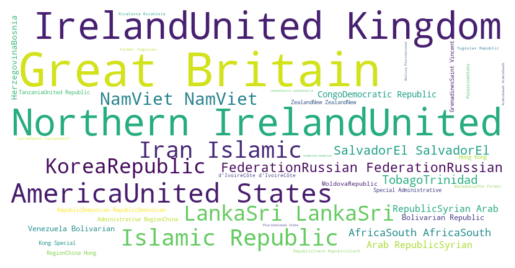

In [105]:
from wordcloud import WordCloud

wordcloud = WordCloud(max_words=50, width=800, height=400, background_color='white', colormap='viridis')

wordcloud.generate(text)

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis("off")

plt.show()

### Regression Plots

**Question**: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.


In [106]:
df_reg = df.copy()

df_reg.drop(columns=['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],inplace=True)

df_reg = df_reg[df_reg['OdName'].isin(['Denmark', 'Norway', 'Sweden'])]

df_reg = df_reg.melt(id_vars='OdName',var_name='Year')

df_reg.rename(columns={'OdName':'Country'}, inplace=True)

df_reg.head()


,Country,Year,value
0,Denmark,1980,272
1,Norway,1980,116
2,Sweden,1980,281
3,Denmark,1981,293
4,Norway,1981,77


In [111]:
df_reg_group = df_reg.groupby('Year')['value'].sum().reset_index()

df_reg_group.head()

,Year,value
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


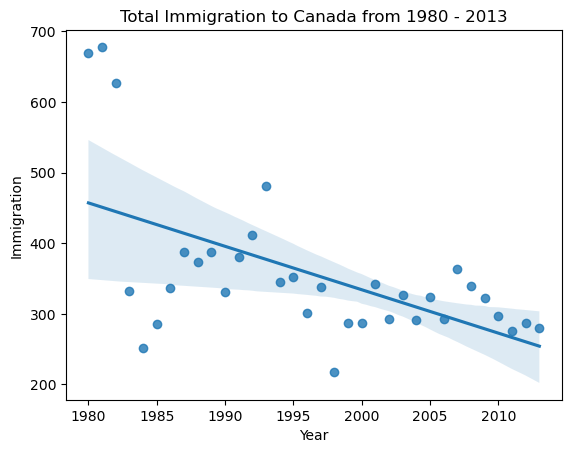

In [114]:
sns.regplot(x='Year',y='value', data=df_reg_group)
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Immigration')
plt.show()